<h3>Rhondene Wint </h3>
<p> Biostatistics  Due Date: Feb.15, 2018 </p>

<h2> Central Limit Theorem by Sampling from a Simulated Poisson Distribution </h2>

<b>Central Limit Theorem</b>:   Let X1, X2, ... , Xn be a random sample from a distribution (any distribution!) with (finite) mean μ and (finite) variance σ<sup>2</sup>. If the sample size n is "sufficiently large," then <i> the sampling distribution of the sample mean is, at least approximately, normally distributed, regardless of the distribution of the underlying random sample</i> (Penn State, STAT414)
<p> <b> Properties of Normal Distribution </b>
<ul> <li> mean of sample means equals the population mean</li>
<li> standard deviation of sample means is porportional to population standard deviation </li>
<li> skewedness is zero </li>
</ul>
<img src='normal_dist.jpg' width=200 height=200 >

<p>As as proof of concept, I will sample from <b>Poisson</b> distribution to demonstrate that a sample distribution aprpaches normality as its sample size increases.</p> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
%matplotlib notebook
import matplotlib 
matplotlib.get_backend() #renders graphics to browswer
import pandas as pd  #may or may not use
import probscale  #creates probablity plots 
import seaborn as sns 


In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [8]:
plt.style.use('seaborn-deep') 

<IPython.core.display.Javascript object>


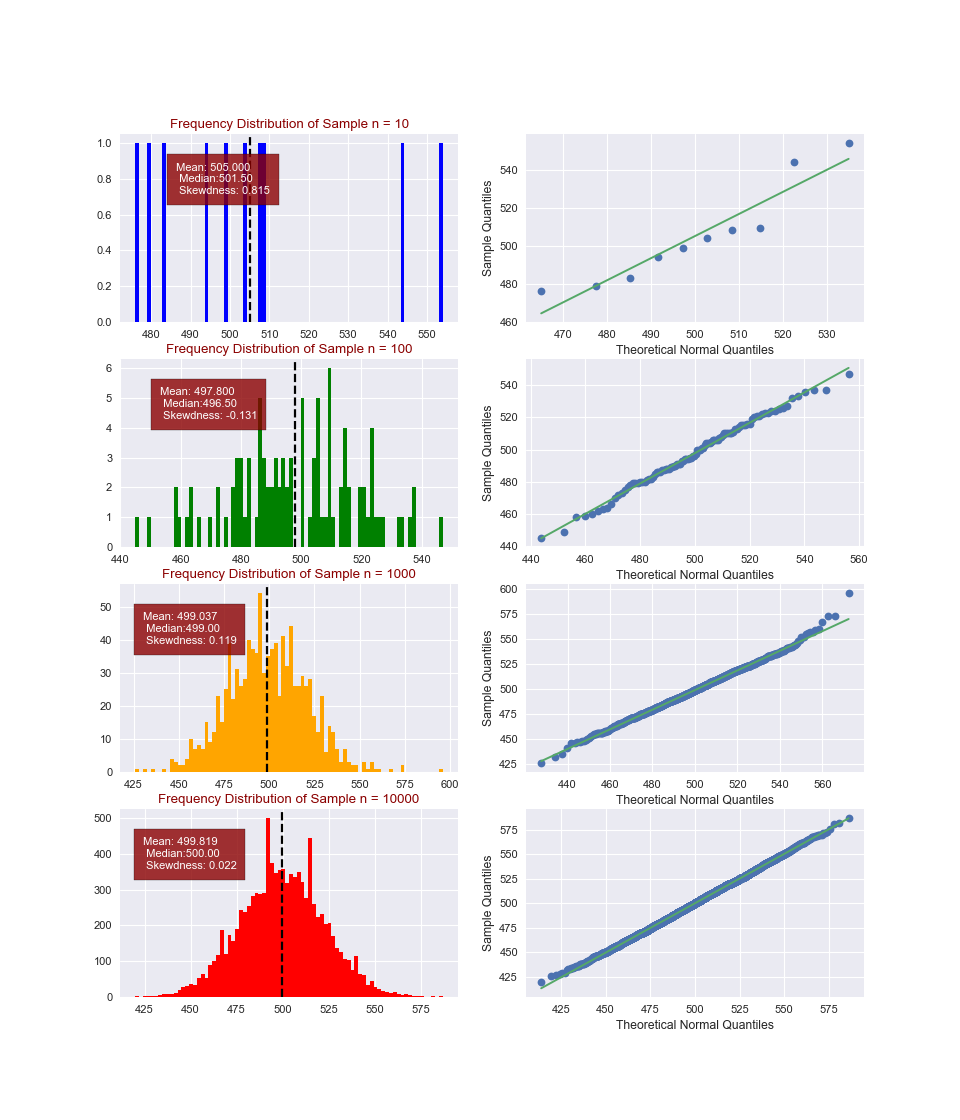

<IPython.core.display.Javascript object>


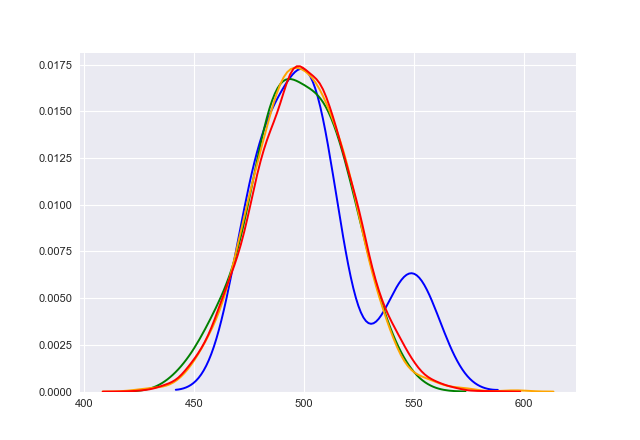

In [46]:
fig,((ax1,qq1),(ax2, qq2),(ax3,qq3),(ax4, qq4)) = plt.subplots(figsize=(12,14), nrows=4, ncols=2) #we don't share y axis since we're looking at different sizes of samples-
axs = [ax1,ax2,ax3,ax4,qq1,qq2,qq3,qq4]  #an axis for each sample size, and qqplots

font = {'family': 'sans serif', 'color':  'darkred', 'weight': 'normal', 'size': 12}

common_arg = dict(plottype='qq', probax='x', bestfit=True,  
                  problabel='Theoretical Normal Quantiles',
                  datalabel='Sample Quantiles')

plt.figure()
import math
sd = math.sqrt(500); # for poisson mean==variance so std is square root of mean   

norm = scipy.stats.norm(loc=500, scale=sd)  #returns a normally distributed sample
b=int(len(axs)/2);  #plots an axis for each sample size, 
color= ['blue','green', 'orange', 'red']

for n in range(0,b):
    sample_size= 10**(n+1)
    sample = np.random.poisson(500, sample_size) # samples from a Poisson distribution with  a mean of 500
    kurt = scipy.stats.kurtosis(sample)
    skew = scipy.stats.skew(sample)
    mean = np.mean(sample)
    median = np.median(sample)
    
    axs[n].hist(sample, bins=80, color=color[n])
    axs[n].set_title('Frequency Distribution of Sample n = {}'.format(sample_size), fontdict=font)
    axs[n].axvline(sample.mean(), color='k', linestyle='dashed', linewidth=2) # dashed line at mean of each sample
    
    ymin, ymax = axs[n].get_ylim();
    xmin, xmax =axs[n].get_xlim();
    
    tex = 'Mean: {:.3f} \n Median:{:.2f} \n Skewdness: {:.3f}'.format(mean,median,skew )
    axs[n].text((xmin*1.03),(ymax*0.85), tex , ha='left', va='top', color='white',bbox={'facecolor':'darkred', 'alpha':0.8, 'pad':8})
    
    sns.kdeplot(sample, color=color[n]) #kernel distribution estimate  (gaussian)
    
    qq=n+4; #so that each qqplot axis is positioned adjacent to their corresponding distribution 
    
    #plots sample quantiles vs quantiles from a standard normal distibution
    fig = probscale.probplot(sample, ax=axs[qq], dist=norm, **common_arg); 
    
sns.despine()


<b> Explanation </b> 

<li> The median and mean nearly converge to the theoretical values as the number of realizations (sample sizes) increases from 100 to 100,000. Skewdnes decreases with sample size as well </li> 
<li> <b>Quantile-quantile</b> plots is a visual way of determinig if two samples are identically distributed. The sample quantile and theoretical normal quantiles become more linearly related with increase in sample size, signifying that the sample is becoming more normally distributed </li>
 
<b> Kernel Density Estimation </b> is a non-parametric way of estimating the probability distribution of a random variable. It is similar to histograms, but unlike histograms it is not constrained by binsize. 
The KDE of the sample becomes more gaussian or normal with increase in sample size. I wanted to overlay each sample with its kde which worked in my first draft code, but it doesn't work here, instead pyplot insists on creating a new figure.  At least they are colour-coded!